In [1]:
import tensorflow as tf
import numpy as np
import os
import re
import io
import librosa
import pickle
import random
import matplotlib.pyplot as plt
import IPython.display as ipd
from os.path import isdir, join
%matplotlib inline

In [30]:
noise_dir = '/home/maikfangogoair/tmp/label_data/_background_noise_/'
def noise_pool(noise_dir):
    noise_list = []
    cnt = 0
    for x in os.listdir(noise_dir):
        if x.endswith(".wav") or x.endswith(".WAV"):
            print("file %s from %d" % (x,cnt))
            y, sr = librosa.load(noise_dir + x , sr=None)
            for i in range(0, y.shape[0], sr):
                if i + sr < y.shape[0]:
                    sample = y[i: i + sr]
                    noise_list.append(sample)
                    cnt += 1
            print("file %s to %d" % (x,cnt))
                    
    print("There are %d one second noise." % len(noise_list))
    return noise_list
noise_list = noise_pool(noise_dir)

file exercise_bike.wav from 0
file exercise_bike.wav to 61
file running_tap.wav from 61
file running_tap.wav to 122
file pink_noise.wav from 122
file pink_noise.wav to 181
file doing_the_dishes.wav from 181
file doing_the_dishes.wav to 276
file dude_miaowing.wav from 276
file dude_miaowing.wav to 337
There are 337 one second noise.


**If integrate the white_noise.wav into feature, it will breaks the feature, take care! **

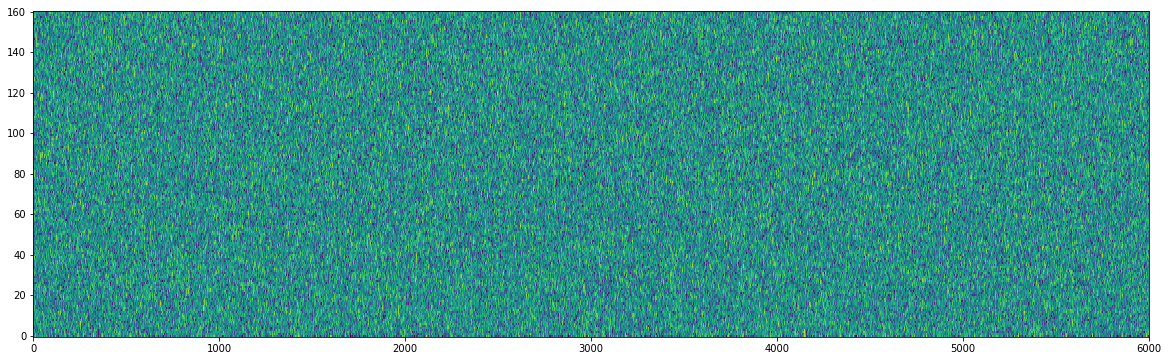

In [48]:
#identify dirty noise
window_size=.02
window_stride=.01
window='hamming'
sr=16000
y, sr = librosa.load("/home/maikfangogoair/tmp/label_data/_background_noise_/white_noise.wav_exclude", sr=None)
n_fft = int(sr * window_size)
win_length = n_fft
hop_length = int(sr * window_stride)

# STFT
D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length,
                 win_length=win_length, window=window)
spect, _ = librosa.magphase(D)
# S = log(S+1)
spect = np.log1p(spect)
fig = plt.figure(figsize=(20 , 6))
ax1 = fig.add_subplot(111)
ax1.imshow(spect , aspect='auto', origin='lower')

In [22]:
window_size=.02
window_stride=.01
window='hamming'
y, sr = librosa.load("/home/maikfangogoair/tmp/label_data/bed/94e6864f_nohash_1.wav", sr=None)
n_fft = int(sr * window_size)
win_length = n_fft
hop_length = int(sr * window_stride)

# STFT
D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length,
                 win_length=win_length, window=window)
spect, _ = librosa.magphase(D)
# S = log(S+1)
spect = np.log1p(spect)
spect.shape

(161, 101)

In [70]:
window_size=.02
window_stride=.01
window='hamming'
y, sr = librosa.load("/home/maikfangogoair/tmp/label_data/bed/94e6864f_nohash_1.wav", sr=None)
y = y + 0.5*sample_list[0]
n_fft = int(sr * window_size)
win_length = n_fft
hop_length = int(sr * window_stride)

# STFT
D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length,
                 win_length=win_length, window=window)
spect2, _ = librosa.magphase(D)
# S = log(S+1)
spect2 = np.log1p(spect2)
spect2.shape

(161, 101)

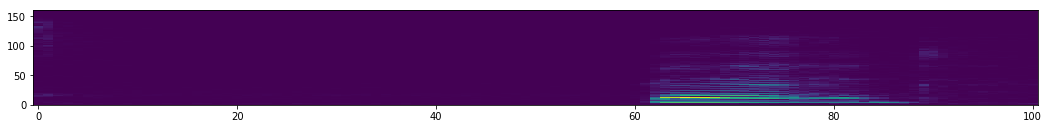

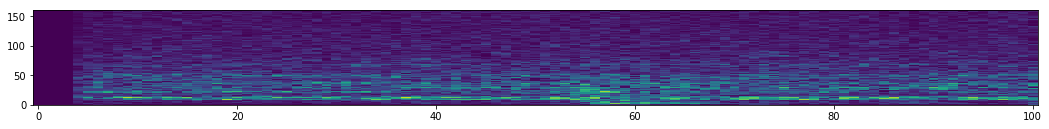

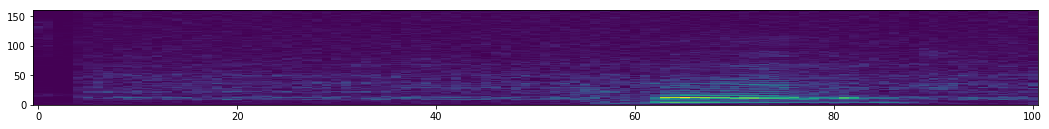

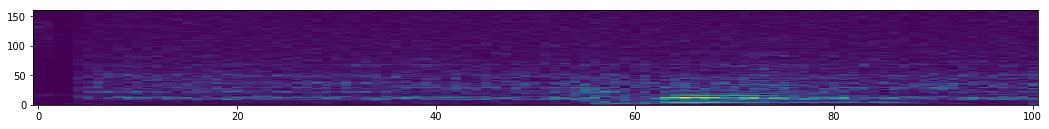

In [71]:
fig = plt.figure(figsize=(18, 8))
ax1 = fig.add_subplot(411)
ax1.imshow(spect , aspect='auto', origin='lower')

fig = plt.figure(figsize=(18, 8))
ax1 = fig.add_subplot(412)
ax1.imshow(spect_list[0]*0.5 , aspect='auto', origin='lower')

fig = plt.figure(figsize=(18, 8))
ax1 = fig.add_subplot(413)
ax1.imshow(spect + spect_list[0]*0.5 , aspect='auto', origin='lower')

fig = plt.figure(figsize=(18, 8))
ax1 = fig.add_subplot(414)
ax1.imshow(spect2 , aspect='auto', origin='lower')

ipd.Audio("/home/maikfangogoair/tmp/label_data/bed/94e6864f_nohash_1.wav")